# Question 1 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.datasets import make_moons,make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

 simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes

In [2]:
np.random.seed(1)

# Create nonlinear dataset
X_xor = np.random.randn(100, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                      X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

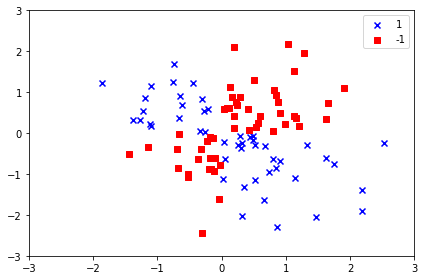

In [3]:
# scatter plot
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c = 'b', marker = 'x',
           label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c = 'r', marker = 's',
           label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [4]:
# define function about visualizing decision_regions
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # set marker and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # draws a decision boundary.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                   alpha = 0.8, c = colors[idx],    # alpha : size of marker
                   marker = markers[idx], label = cl,
                   edgecolor = 'black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c = '', edgecolor = 'black', alpha = 1,
                   s = 100, label = 'test set')

### Linear

C:\Users\124ab\AppData\Local\Temp/ipykernel_64660/1797090875.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


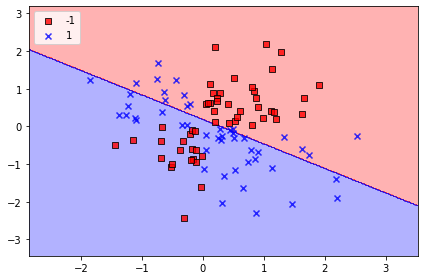

In [34]:
svm = SVC(kernel = 'linear', random_state = 1, gamma = 0.1, C = 10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [35]:
y_pred=svm.predict(X_xor)
print('Accuracy Score:')
print(metrics.accuracy_score(y_xor,y_pred))

Accuracy Score:
0.65


### RBF

C:\Users\124ab\AppData\Local\Temp/ipykernel_64660/1797090875.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


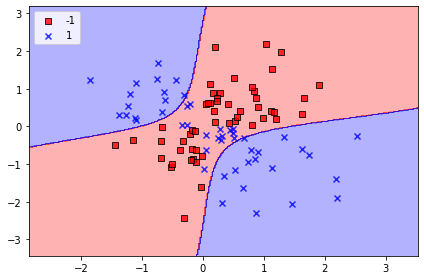

In [36]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C = 10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [37]:
y_pred=svm.predict(X_xor)
print('Accuracy Score:')
print(metrics.accuracy_score(y_xor,y_pred))

Accuracy Score:
0.85


### Polynomial

C:\Users\124ab\AppData\Local\Temp/ipykernel_64660/1797090875.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


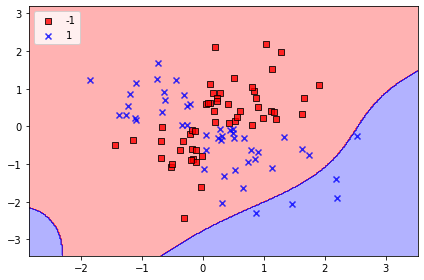

In [42]:
svm = SVC(kernel = 'poly', random_state = 1, gamma = 0.1, C = 10, degree = 5)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [43]:
y_pred=svm.predict(X_xor)
print('Accuracy Score:')
print(metrics.accuracy_score(y_xor,y_pred))

Accuracy Score:
0.57


In [48]:
x1 = np.random.randn(500, 1)
x2 = np.random.randn(500, 1)
y = ((x1**2) - (x2**2)) > 0
y1 = y.astype(int)

In [46]:
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c = 'b', marker = 'x',
           label = '1')
plt.show()

NameError: name 'plot' is not defined

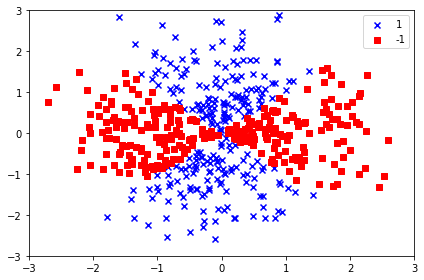

In [49]:
# scatter plot
plt.scatter(x1[y1 == 0],
           x2[y1 == 0],
           c = 'b', marker = 'x',
           label = '1')
plt.scatter(x1[y1 == 1],
           x2[y1 ==  1],
           c = 'r', marker = 's',
           label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Question-2

In [6]:
X,y  = make_classification(n_samples = 500,n_features = 2,n_classes = 2,n_redundant=0,random_state = 11)

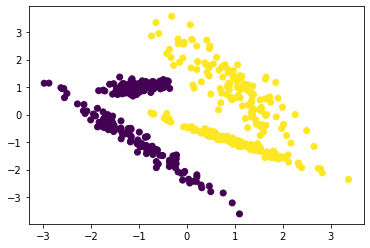

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [9]:
clf = LogisticRegression(random_state=0)

In [10]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
clf.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [12]:
clf.score(X_train, y_train)

0.9611940298507463

In [13]:
clf.score(X_test, y_test)

0.9636363636363636

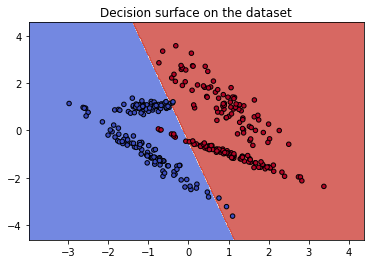

In [14]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision surface on the dataset')
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_title(title)
plt.show()